In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('cardio_train.csv')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 13)

In [5]:
rows_to_remove = 67000
data = data.sample(frac=1).reset_index(drop=True)
data = data.iloc[:-rows_to_remove]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3000 non-null   int64  
 1   age          3000 non-null   int64  
 2   gender       3000 non-null   int64  
 3   height       3000 non-null   int64  
 4   weight       3000 non-null   float64
 5   ap_hi        3000 non-null   int64  
 6   ap_lo        3000 non-null   int64  
 7   cholesterol  3000 non-null   int64  
 8   gluc         3000 non-null   int64  
 9   smoke        3000 non-null   int64  
 10  alco         3000 non-null   int64  
 11  active       3000 non-null   int64  
 12  cardio       3000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 304.8 KB


In [7]:
data.drop('id', axis=1, inplace=True)

In [8]:
print(data['gender'].value_counts())
print(data['cholesterol'].value_counts())
print(data['gluc'].value_counts())

gender
1    1988
2    1012
Name: count, dtype: int64
cholesterol
1    2222
2     421
3     357
Name: count, dtype: int64
gluc
1    2542
3     237
2     221
Name: count, dtype: int64


In [9]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [10]:
data['age'] = round(data['age'] / 365)
data['height'] = round(data['height'] / 2.54)
data['weight'] = round(data['weight'] * 2.205)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,51.0,2,68.0,196.0,120,80,1,1,0,0,1,0
1,44.0,1,62.0,150.0,100,70,1,1,0,0,0,0
2,54.0,1,64.0,181.0,120,80,1,1,0,0,1,1
3,53.0,2,67.0,143.0,130,90,3,1,0,0,1,1
4,50.0,2,63.0,154.0,160,100,1,1,0,0,1,1


In [11]:
data.replace([True, False], [1,0], inplace=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,51.0,2,68.0,196.0,120,80,1,1,0,0,1,0
1,44.0,1,62.0,150.0,100,70,1,1,0,0,0,0
2,54.0,1,64.0,181.0,120,80,1,1,0,0,1,1
3,53.0,2,67.0,143.0,130,90,3,1,0,0,1,1
4,50.0,2,63.0,154.0,160,100,1,1,0,0,1,1


In [12]:
data = data.sample(frac=1).reset_index(drop=True)
X = data.drop('cardio', axis=1)
X.astype('float')
Y = data['cardio'].to_numpy()
Y

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 11)
(600, 11)
(2400,)
(600,)


In [16]:
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No Diabetes', 'Diabetes']); ax.yaxis.set_ticklabels(['No Diabetes', 'Diabetes']) 
    plt.show()

In [17]:
parameters = {
    'C': [0.01,0.1,1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr = LogisticRegression()

In [18]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [19]:
print("Best Parameters: ", logreg_cv.best_params_)
print("Accuracy Score: ", logreg_cv.best_score_)

Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy Score:  0.7229166666666667


In [20]:
test_accuracy = logreg_cv.score(x_test, y_test)
print(test_accuracy)

0.695


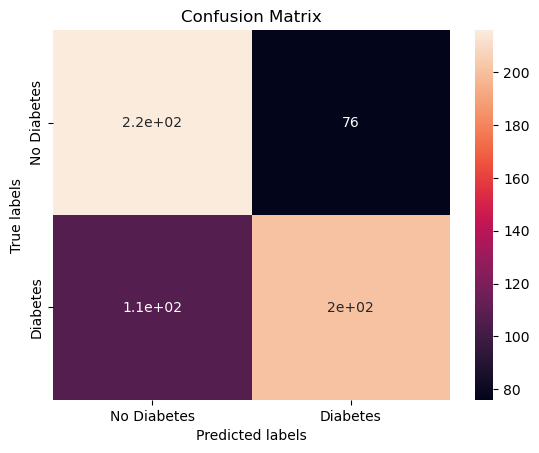

In [21]:
yhat = logreg_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [22]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

tree = DecisionTreeClassifier()

In [23]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
print("Best Parameters: ", tree_cv.best_params_)
print("Accuracy Score: ", tree_cv.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy Score:  0.7120833333333333


In [25]:
test_accuracy = tree_cv.score(x_test, y_test)
print(test_accuracy)

0.69


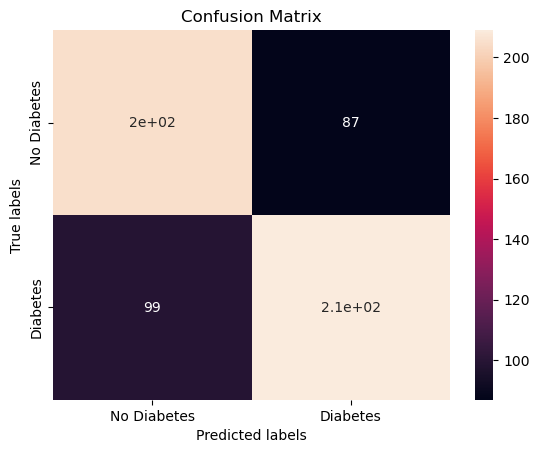

In [26]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [27]:
parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

KNN = KNeighborsClassifier()

In [28]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [29]:
print("Best Parameters: ", knn_cv.best_params_)
print("Accuracy Score: ", knn_cv.best_score_)

Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
Accuracy Score:  0.6829166666666666


In [30]:
test_accuracy = knn_cv.score(x_test, y_test)
print(test_accuracy)

0.6783333333333333


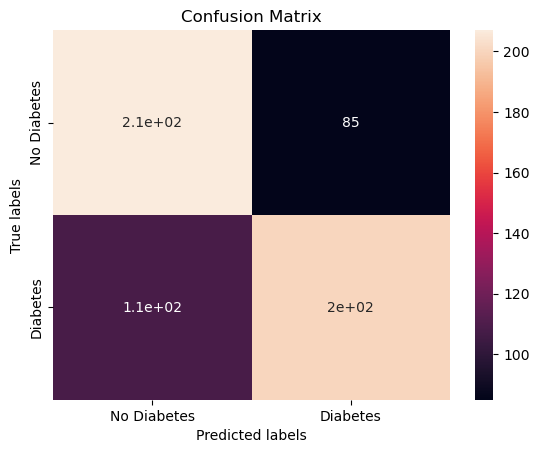

In [31]:
yhat = knn_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [32]:
parameters = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3,5,7],
    'n_estimators': [100,200,300]
}

model = xgb.XGBClassifier()

In [33]:
xgb_cv = GridSearchCV(model, parameters, cv=10)
xgb_cv.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [34]:
print("Best Parameters: ", xgb_cv.best_params_)
print("Accuracy Score: ", xgb_cv.best_score_)

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Accuracy Score:  0.7254166666666666


In [35]:
test_accuracy = xgb_cv.score(x_test, y_test)
print(test_accuracy)

0.705


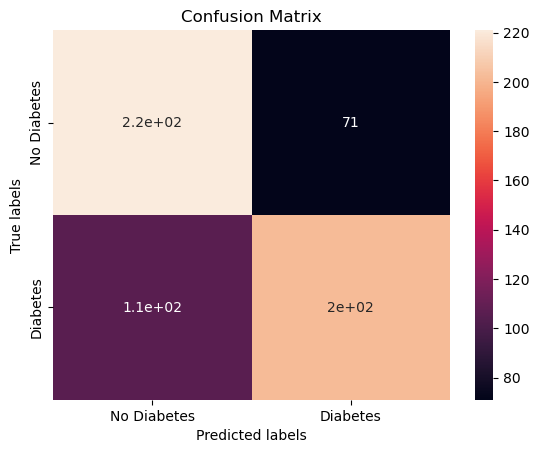

In [36]:
yhat = xgb_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

In [37]:
classifier = [logreg_cv, tree_cv, xgb_cv, knn_cv]
for clf in classifier:
    clf.fit(X, Y)
    best_es = clf.best_estimator_
    mean_accuracy = clf.best_score_
    print(f"{clf.estimator.__class__.__name__} with GridSearchCV: Best Estimator = {best_es}, Mean Accuracy = {mean_accuracy:.4f}")

LogisticRegression with GridSearchCV: Best Estimator = LogisticRegression(C=0.1), Mean Accuracy = 0.7197
DecisionTreeClassifier with GridSearchCV: Best Estimator = DecisionTreeClassifier(max_depth=2), Mean Accuracy = 0.7063
XGBClassifier with GridSearchCV: Best Estimator = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=No

In [38]:
import pickle

In [39]:
best_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)
best_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
yhat = best_model.predict(x_test)
test_score = accuracy_score(y_test, yhat)
print(test_score)

0.6966666666666667


In [41]:
pickle.dump(best_model, open('cardiovascular_prediction.pkl', 'wb'))

In [43]:
cardio_model = pickle.load(open('cardiovascular_prediction.pkl', 'rb'))
cardio_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
pickle.dump(cardio_model, open('cardiovascular_prediction.pkl', 'wb'))